In [1]:
import pandas as pd
from sudulunu.helpers import pp, make_num, dumper
import os 

In [2]:
def combine_from_folder(pathos):
  
  listo = []
  
  fillos = os.listdir(pathos)
  fillos = [pathos + '/' + x for x in fillos if '.csv' in x]
  # print(fillos)

  city_dicto = {}
  for city in fillos:
    city_dicto[city] = city.replace("data/", '').replace('.csv', '')
  
  # print(city_dicto)

  for fillo in fillos:
    inter = pd.read_csv(fillo)

    temp_col = [x for x in inter.columns.tolist() if 'time' in x.lower()]
    inter.rename(columns={temp_col[0]: "Time"}, inplace=True)
    inter['City'] = city_dicto[fillo]

    listo.append(inter)

  cat = pd.concat(listo)

  return cat

data = combine_from_folder('data')


In [3]:
df = data.copy()
# 'Time', 'Temp (°C)', 'Feels Like (°C)', 'Humidity(%)', 
# 'Wind Direction', 'Wind Speed (km/h) (knots)', 'Wind Gust (km/h) (knots)', 
# 'Pressure (hPa)', 'Rainfall since 9 am (mm)', 'Date', 'City'

df = df[['Time', 'Temp (°C)', 'Date','City']]
# df = df[['Time', 'Feels Like (°C)', 'Date','City']]

# pp(df)

### Only keep the whole hour data
df['Time'] = pd.to_datetime(df['Time'], format='%I:%M %p')
# df = df[df['Time'].dt.minute.eq(0) & df['Time'].dt.second.eq(0) & df['Time'].dt.hour.gt(9)]
df = df[df['Time'].dt.minute.eq(0) & df['Time'].dt.second.eq(0)]


In [4]:
listo = []
# for city in df['City'].unique().tolist():
#     inter = df.loc[df['City'] == city].copy()
#     inter = make_num(inter, 'Temp (°C)')
#     grp = inter.groupby(by=['Time'])['Temp (°C)'].mean().reset_index()
#     grp['']
#     listo.append(grp)

# cat = pd.concat(listo)

# df = make_num(df, 'Feels Like (°C)')
# grp = df.groupby(by=['City', 'Time'])['Feels Like (°C)'].mean().reset_index()

df = make_num(df, 'Temp (°C)')
grp = df.groupby(by=['City', 'Time'])['Temp (°C)'].mean().reset_index()
grp.sort_values(by=['City', 'Time'], ascending=True, inplace=True)



grp['Time'] = grp['Time'].dt.strftime("%H:%M")

# pp(grp)

In [5]:
piv = pd.pivot(grp, index='City', columns='Time').reset_index()

pp(piv)

           City  Temp (°C)                                              \
Time                 00:00      01:00      02:00      03:00      04:00   
0      Adelaide  21.122222  20.855556  20.255556  19.966667  19.700000   
1      Brisbane  22.277778  21.988889  21.755556  21.722222  21.400000   
2      Canberra  15.466667  14.533333  14.366667  14.311111  13.311111   
3        Hobart  15.933333  15.777778  15.544444  15.533333  15.111111   
4     Melbourne  19.066667  18.800000  18.800000  18.300000  18.100000   
5         Perth  22.922222  22.355556  21.611111  21.277778  20.322222   
6        Sydney  21.366667  21.355556  20.888889  20.433333  20.066667   

                                                ...                        \
Time      05:00      06:00      07:00    08:00  ...      14:00      15:00   
0     19.322222  18.822222  18.787500  19.9500  ...  28.255556  28.977778   
1     21.155556  20.944444  22.162500  23.9000  ...  28.388889  27.988889   
2     13.233333  13.44444

<AxesSubplot: xlabel='None-Time', ylabel='City'>

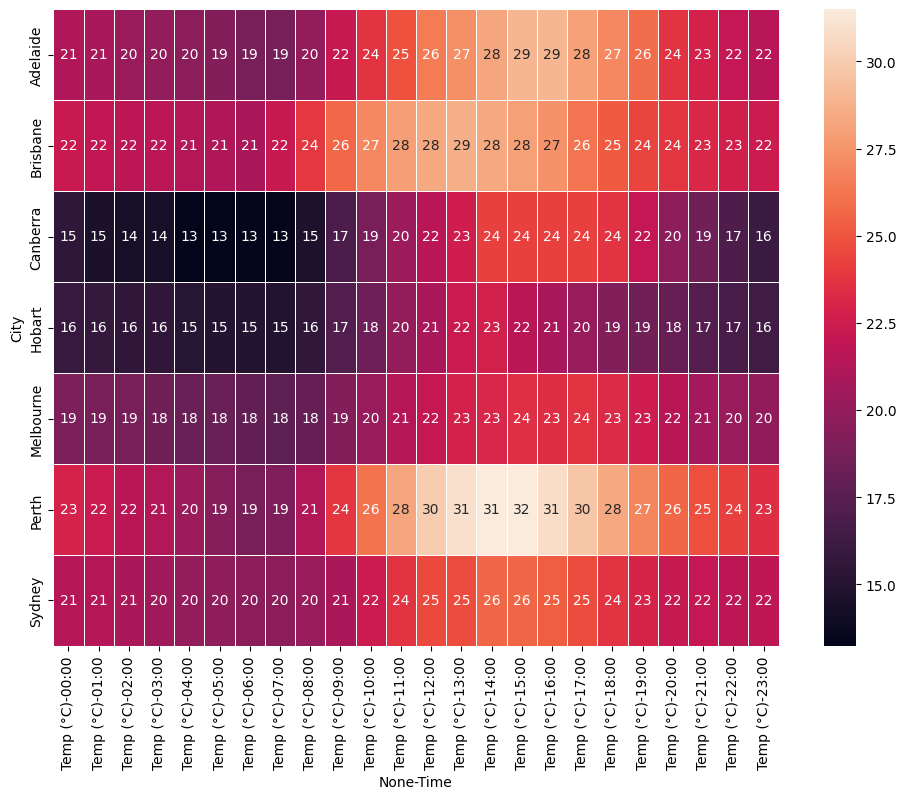

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

piv.set_index("City", inplace=True)

a4_dims = (11.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
sns.heatmap(piv, annot=True, linewidth=0.5)

        City      Range
6      Perth     12.675
3   Canberra  11.041667
1   Adelaide  10.190278
4     Hobart   7.841667
2   Brisbane   7.722222
5  Melbourne   5.966667
7     Sydney   5.933333
['City', 'Range']


/var/folders/1h/4w391kn52y51w5mmd37_xfn80000gq/T/ipykernel_91151/2690026419.py:3: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  biv = biv.append((biv.max(numeric_only=True) - biv.min(numeric_only=True)).rename("Range"))


<AxesSubplot: xlabel='City', ylabel='Range'>

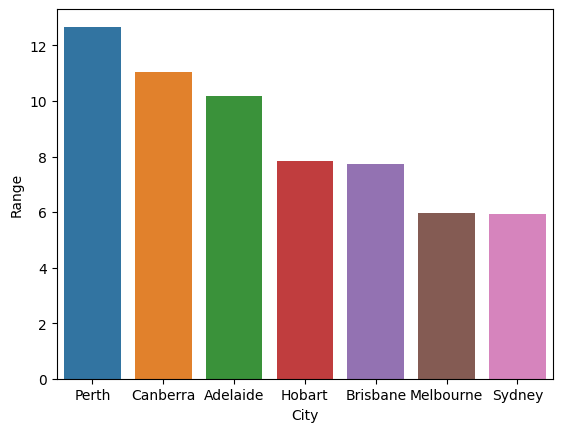

In [7]:
biv = pd.pivot(grp, index='Time', columns='City').reset_index()

biv = biv.append((biv.max(numeric_only=True) - biv.min(numeric_only=True)).rename("Range"))
biv = biv.loc[biv.index == 'Range']

biv = biv.T.reset_index()
biv = biv[1:]
biv = biv[['City', 'Range']]
biv.sort_values(by=['Range'], inplace=True, ascending=False)

pp(biv)

sns.barplot(data=biv, x="City", y="Range")